# Questions 

1. in 操作：　python list O(n(  python dict O(1)   为啥list是数组，ｄｉｃｔ是链表？？？

In [1]:
import numpy as np
from timeit import Timer
import random
import matplotlib.pyplot as plt
%matplotlib inline

## 1.17 Programming Exercise

In [1]:
def gcd(m,n):
    while m%n != 0:
        oldm = m
        oldn = n

        m = oldn
        n = oldm%oldn
    return n

class Fraction:
     def __init__(self,top,bottom):
         self.num = top
         self.den = bottom

     def __str__(self):
         return str(self.num)+"/"+str(self.den)

     def show(self):
         print(self.num,"/",self.den)

     def __add__(self,otherfraction):
         newnum = self.num*otherfraction.den + \
                      self.den*otherfraction.num
         newden = self.den * otherfraction.den
         common = gcd(newnum,newden)
         return Fraction(newnum//common,newden//common)

     def __eq__(self, other):
         firstnum = self.num * other.den
         secondnum = other.num * self.den

         return firstnum == secondnum



## 2.11 Programming Exercises

(0, 1)

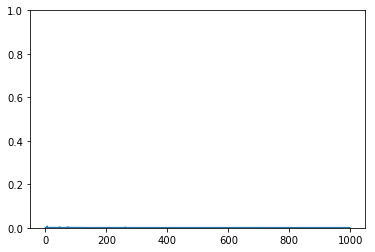

In [21]:
# Q1
import numpy as np
from timeit import Timer
import random
import matplotlib.pyplot as plt
%matplotlib inline

times = []
for i in range(1, 1000):
    lst = list(range(i))
    index_timer = Timer('lst[random.randrange(%d)]'%i, 'from __main__ import lst, random')
    time = index_timer.timeit(number=1000)
    times.append(time)

    
plt.plot(times)
plt.ylim([0, 1])

(0, 1)

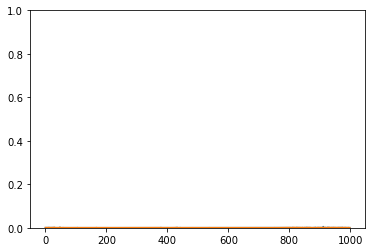

In [56]:
#Q2 
gets = []
sets = []

for i in range(1, 1000):
    dic = {j: None for j in range(i)}
    get_timer = Timer('dic[random.randrange(%d)]'%i, 'from __main__ import dic, random')
    get_time = get_timer.timeit(number =1000)
    gets.append(get_time)
    set_timer = Timer('dic[random.randrange(%d)] = 3'%i, 'from __main__ import dic, random')
    set_time = set_timer.timeit(number=1000)
    sets.append(set_time)
    
plt.plot(gets)
plt.plot(sets)
plt.ylim([0, 1])

In [8]:
i = 3
x = range(3)
random.randrange(3)
x

[0, 1, 2]

#  Chapter 3. Basic Data Stracture

## implement a stack instance

In [3]:
# implement a stack instance

class Stack:
    
    def __init__(self):
        self.stack = []
    
    def push(self, item):
        self.stack.append(item)
        
    def pop(self):
        return self.stack.pop()
        
    def peek(self):
#         print ('self.stack ', self.stack)
        return self.stack[-1]
    
    def size(self):
        return len(self.stack)
        
    def isEmpty(self):
        if self.size()==0:
            return True
        else: 
            return False
    
    

In [16]:
s = Stack()
print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


### inbalance parentheses proble with stack 

In [105]:
# inbalance parentheses proble with stack 

def parChecker(ps):
    s = Stack()
    balance = True
    idx = 0
    while idx < len(ps) and balance:
        if ps[idx] == '(':
            s.push(1)
        else:
            if s.isEmpty():
                balance = False
            else:
                s.pop()
        idx += 1
#     print(balance)
#     print(s.isEmpty())
    if balance and s.isEmpty():
        return True
    else:
        return False
    
print(parChecker('((()))'))
print(parChecker('(()'))          


False
False


### general case: inbalance symbols

In [20]:
# general case: inbalance symbols

def match(o, c):
    opener = '{(['
    closer = '})]'
    return opener.index(o) == closer.index(c)

def symChecker(symbols):
    s = Stack()
    balance = True
    idx = 0
    while idx < len(symbols) and balance:
        sym = symbols[idx]
        if sym in  '{([':
            s.push(sym)
        else:
            if s.isEmpty():
                balance = False
            else:
                item = s.pop()
#                 print(item)
#                 print(sym)
#                 print(match(item, sym))
                if not match(item, sym):
                    balance = False
# #         print(s.stack)
#         print('isempty', s.isEmpty())
#         print('stack', s.stack)
#         print('size', s.size())
        idx += 1
#     print(balance)
#     print(s.isEmpty())
#     print(s.stack)
    if balance and s.isEmpty():
        return True
    else:
        return False    


In [22]:
print(symChecker('{{([][])}()}'))
print(symChecker('[{()]'))

True
False


### Converting dicimal numbers to binary nunbers

`'Divided by 2' algorithm: continually divides the dicimal number by 2 and keeps track of the remainders. The first remainder we compute will actually be the last digit. 

In [36]:
def dividedBy2(num):
    s = Stack()
    
    # my version:
#     fold = num // 2
#     remainder = num % 2
#     while not (fold == 0 and remainder == 0):
#         s.push(remainder)
#         num = fold
#         fold = num // 2
#         remainder = num % 2

    # book version:
    while num > 0:
        remainder = num % 2
        num  = num // 2
        s.push(remainder)
    
    
    binary = '0'
    while not s.isEmpty():
        binary += str(s.pop())
    return int(binary)
    
    

In [37]:
for i in range(10):
    print(dividedBy2(i))

0
1
10
11
100
101
110
111
1000
1001


In [38]:
dividedBy2(42)

101010

This algorithm can be used for any base.

In [39]:
def divideChecker(num, base):
    s = Stack()
    
    # my version:
#     fold = num // 2
#     remainder = num % 2
#     while not (fold == 0 and remainder == 0):
#         s.push(remainder)
#         num = fold
#         fold = num // 2
#         remainder = num % 2

    # book version:
    while num > 0:
        remainder = num % base
        num  = num // base
        s.push(remainder)
    
    
    result = '0'
    while not s.isEmpty():
        result += str(s.pop())
    return int(result)

In [47]:
print(divideChecker(26, 26))
# print(divideChecker(25, 16))

10


### Infix, prefix, postfix expression

infix to postfix

In [23]:
def infixToPostfix(expression):
    
    opstack = Stack()
    oprators = {'+': 1, '-':1, '*': 2, '/':2, '**':3}
    result = []
    
    for item in expression:
        if item in oprators.keys():
            if opstack.size() != 0:
                while (opstack.size() != 0) and (opstack.peek() in oprators.keys()) and oprators[opstack.peek()] >= oprators[item]:
#                     print('size ', opstack.size())
#                     print('peek ', opstack.peek())
#                     # #                 print ('stack size ', opstack.size())
# # #                 print ('stack', opstack.stack)
# # #                 print('opstack.stack[-1] ', opstack.stack[-1])
#                     if oprators[opstack.peek()] >= oprators[item]:
                        result.append(opstack.pop()) 
            opstack.push(item)
                
        elif item == '(':
            opstack.push(item)
        elif item == ')':
            top = opstack.pop()
            while top != '(':
                result.append(top)
                top = opstack.pop()
        elif item in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or item in "0123456789":
            result.append(item)
    
    while not opstack.isEmpty():
        result.append(opstack.pop())
        
    return ' '.join(result)

In [24]:

print(infixToPostfix("A*B+C*D"))
print(infixToPostfix("( A + B ) * C - ( D - E ) * ( F + G )"))

# infixToPostfix('A+B')

A B * C D * +
A B + C * D E - F G + * -


In [25]:
infixToPostfix('5 * 3 ** (4 - 2)')

'5 3 * * 4 2 - *'

Postfix evaluation

In [21]:
def postfixEval(exp):
    post_stack = Stack()
    
    for item in exp:
        if item in '0123456789':
            post_stack.push(item)
        elif item in '+-*/':
            newer = float(post_stack.pop())
            older = float(post_stack.pop())
            if item == '+':
                post_stack.push(str(newer+older))
            elif item == '-':
                post_stack.push(str(older - newer))
            elif item == '*':
                post_stack.push(str(older * newer))
            else:
                post_stack.push(str(older / newer))
        
    return post_stack.pop()

In [22]:
print(postfixEval('7 8 + 3 2 + /'))

3.0


## 3.10 Queue

Implement a quene instance

In [25]:
class Queue():
    
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item)
    
    def dequeue(self):
        return self.items.pop()
    
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)
    
    

In [2]:
q = Queue()
q.enqueue('hello')
q.enqueue('dog')
q.enqueue(3)
q.dequeue()
q.size()
q.items

[3, 'dog']

Simulation hot potato

In [9]:
def hotPotato(namelist, num):
    names = Queue()
    for name in namelist:
        names.enqueue(name)
    
    while num > 0:

        dequeue_name = names.dequeue()
        names.enqueue(dequeue_name)
        num -= 1
    # remove the one with the potato
    names.dequeue()
    
    return names.dequeue()

In [10]:
print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],7))

Susan


## 3.14 Simulation: Printing Tasks 

### from random import randrange


In [89]:
# help function to decide weather there is a tast

from random import randrange

def newTask():
    if randrange(1, 181) == 180:
        return True
    else:
        return False
    

In [113]:
# Printer instance
class Printer:
    
    def __init__(self, ppm):
        self.pagerate = ppm
        self.currentTask = None
        self.remainTime = 0 


    def isBusy(self):
        if self.remainTime != 0:
            return True
        else:
            return False
        
    def tick(self):
        if self.currentTask != None:
            self.remainTime -= 1
            if self.remainTime <= 0:
                self.currentTask = None
            
        
    def startNext(self, newTask):
        self.currentTask = newTask
        self.remainTime = newTask.getPage() * 60 / self.pagerate       
        
        

In [114]:
# Task instance
class Task:
    
    def __init__(self, beginTime):
        self.page = randrange(1, 21)
        self.timeStamp = beginTime
        
    def getPage(self):
        return self.page
    
    def getStamp(self):
        return self.timeStamp

    

In [117]:
import numpy as np 

def mainSimulation(totalTime, pageRate):
    # initialize 
    labPrinter = Printer(pageRate)
    taskQueue = Queue()
    waitingtime = []
    
    for currenttime in range(totalTime):
        if newTask():
            newtask = Task(currenttime)
            taskQueue.enqueue(newtask)

#         # debug: 
#         newtask = Task(currenttime)
#         taskQueue.enqueue(newtask)
#         print('printer busy ', not labPrinter.isBusy())
#         print('task empty ', not taskQueue.isEmpty())
        
        if (not labPrinter.isBusy()) and (not taskQueue.isEmpty()):
            current_task = taskQueue.dequeue()
            time = currenttime - current_task.getStamp()
#             print('time ', time)
            waitingtime.append(time)
            labPrinter.startNext(current_task)
        labPrinter.tick()
#     waitingtime = np.array(waitingtime)
#     print('Waitingtime ', waitingtime)
    if len(waitingtime) != 0:
        avg_time = sum(waitingtime) / len(waitingtime)
    else:
        avg_time = 0
#     avg_time = waitingtime.mean()
#     avg_time = sum(waitingtime) / len(waitingtime)
        
    print('The average waiting time is %f and %d task remained'%(avg_time, taskQueue.size()))
            

In [119]:
for i in range(10):
    mainSimulation(3600, 5)

The average waiting time is 42.000000 and 0 task remained
The average waiting time is 174.000000 and 4 task remained
The average waiting time is 170.000000 and 0 task remained
The average waiting time is 100.000000 and 3 task remained
The average waiting time is 169.000000 and 1 task remained
The average waiting time is 32.000000 and 0 task remained
The average waiting time is 206.000000 and 0 task remained
The average waiting time is 61.000000 and 4 task remained
The average waiting time is 55.000000 and 2 task remained
The average waiting time is 243.000000 and 2 task remained


In [120]:
for i in range(10):
    mainSimulation(3600, 10)

The average waiting time is 32.000000 and 0 task remained
The average waiting time is 46.000000 and 0 task remained
The average waiting time is 19.000000 and 0 task remained
The average waiting time is 12.000000 and 1 task remained
The average waiting time is 5.000000 and 0 task remained
The average waiting time is 5.000000 and 0 task remained
The average waiting time is 7.000000 and 0 task remained
The average waiting time is 13.000000 and 0 task remained
The average waiting time is 23.000000 and 0 task remained
The average waiting time is 12.000000 and 0 task remained


## 3. 17 Implementing a Deque in Python 

In [162]:
class Deque():
    
    def __init__(self):
        self.items = []
        
    def addFront(self, item):
        self.items.append(item)
    
    def addRear(self, item):
        self.items.insert(0, item)
        
    def removeFront(self):
        return self.items.pop()
    
    def removeRear(self):
        return self.items.pop(0)
    
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)
        

## 3. 18 Palindrome-Checker

In [165]:
def palchecker(char):
    check_deque = Deque()
    result = True
    
    for item in char:
        check_deque.addRear(item)
    while check_deque.size() >1 and result:
        rear = check_deque.removeRear()
        front = check_deque.removeFront()
        if rear != front:
            result = False
            
    return result
        

In [167]:
print(palchecker("lsdkjfskf"))
print(palchecker("radar"))


False
True


## 3.21 Implementing an Unordered List: Linked Lists 

In [168]:
# node class, two kinds of info: 1. of this filed  2. of next field

class Node:
    
    def __init__(self, initData):
        self.data = initData
        self.next = None
        
    def getData(self):
        return self.data
    
    def getNext(self):
        return self.next
    
    def setData(self, data):
        self.data = data
    
    def setNext(self, data):
        self.next = data
        
        

In [231]:
# unordered list

class UnorderedList:
    
    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    def add(self, item):
        node = Node(item)
        node.setNext(self.head)
        self.head = node  
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            current = current.getNext()
            count += 1
        return count
    
    def search(self, item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()        
        return found
    
    def remove(self, item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())    
            
        
    def append(self, item):
        current = self.head
        previous = None
        
        while current != None:
            previous = current
            current = current.getNext()
        if previous == None:
            self.add(item)
        else:
            previous.setNext(Node(item))
            
    

In [232]:
mylist = UnorderedList()

mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))

mylist.add(100)
print(mylist.search(100))
print(mylist.size())

mylist.remove(54)
print(mylist.size())
mylist.remove(93)
print(mylist.size())
mylist.remove(31)
print(mylist.size())
print(mylist.search(93))


6
True
False
True
7
6
5
4
False


## 3.22 The Ordered List Abstract Data Type

In [237]:
# Ordered list

class OrderedList:
    
    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    def add(self, item):
#         node = Node(item)
#         node.setNext(self.head)
#         self.head = node  
        current = self.head
        previous = None
        stop = False
        
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()
        if previous == None:
            node = Node(item)
            node.setNext(self.head)
            self.head = node     
        else:
            previous.setNext(Node(item))            
        
        
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            current = current.getNext()
            count += 1
        return count
    
    def search(self, item):
        current = self.head
        found = False
        stop = False
        while current != None and not found and not stop:
            if current.getData() == item:
                found = True
            else:
                if current.getData() > item:
                    stop = True
                else:
                    current = current.getNext()        
        return found
    
    def remove(self, item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())    
